# Correlação da Carteira

In [41]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [42]:
tickers = ['USIM5.SA', 'TIET4.SA', 'ENBR3.SA', 'ITUB4.SA', 'ABCB4.SA',
           'LEVE3.SA', 'ABEV3.SA', 'FLRY3.SA', 'ODPV3.SA', 'PSSA3.SA', 'WHRL3.SA']
#tickers = ['NOBL', 'IAU', 'VGT', 'AMZN', 'M', 'LB', 'JNJ', 'VNQ']

### Calculando a variação diária de cada ação da carteira

In [43]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = web.get_data_yahoo(b, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

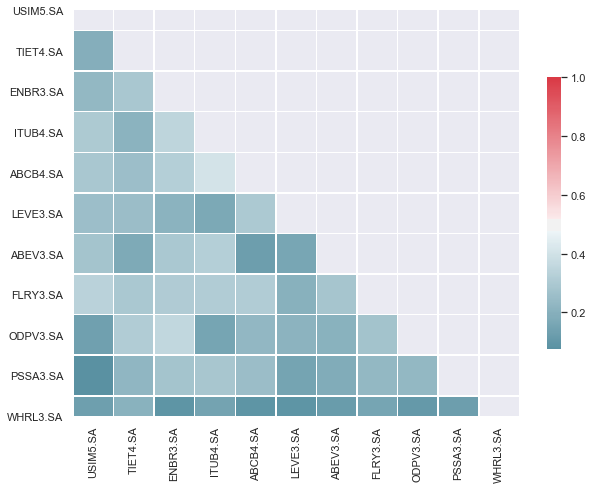

In [44]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [45]:
correlacao

,USIM5.SA,TIET4.SA,ENBR3.SA,ITUB4.SA,ABCB4.SA,LEVE3.SA,ABEV3.SA,FLRY3.SA,ODPV3.SA,PSSA3.SA,WHRL3.SA
USIM5.SA,1.000000,0.195665,0.231112,0.305695,0.292994,0.256197,0.279551,0.336602,0.135461,0.075298,0.132764
TIET4.SA,0.195665,1.000000,0.291378,0.209449,0.258484,0.253063,0.173644,0.298939,0.315958,0.226603,0.205938
ENBR3.SA,0.231112,0.291378,1.000000,0.351170,0.322409,0.208983,0.298544,0.313693,0.360044,0.277667,0.087786
ITUB4.SA,0.305695,0.209449,0.351170,1.000000,0.404671,0.169451,0.322447,0.315459,0.156646,0.286645,0.149449
ABCB4.SA,0.292994,0.258484,0.322409,0.404671,1.000000,0.299637,0.126634,0.314148,0.228003,0.254042,0.087826
LEVE3.SA,0.256197,0.253063,0.208983,0.169451,0.299637,1.000000,0.158607,0.202117,0.213108,0.152818,0.090299
ABEV3.SA,0.279551,0.173644,0.298544,0.322447,0.126634,0.158607,1.000000,0.283295,0.206755,0.181597,0.121166
FLRY3.SA,0.336602,0.298939,0.313693,0.315459,0.314148,0.202117,0.283295,1.000000,0.276372,0.233022,0.156029
ODPV3.SA,0.135461,0.315958,0.360044,0.156646,0.228003,0.213108,0.206755,0.276372,1.000000,0.232811,0.110622
PSSA3.SA,0.075298,0.226603,0.277667,0.286645,0.254042,0.152818,0.181597,0.233022,0.232811,1.000000,0.128939
